In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
cd "G:\My Drive\GRAD-C24_Machine_Learning\data"

G:\My Drive\GRAD-C24_Machine_Learning\data


In [5]:
# Negative Sample
neg_sample_visibility = pd.read_csv('../data/processed/neg_sample_visibility.csv', index_col=[0])
neg_sample_temperature = pd.read_csv('../data/processed/neg_sample_temperature.csv', index_col=[0])
neg_sample_precipitation = pd.read_csv('../data/processed/neg_sample_precipitation.csv', index_col=[0])
negative_sample = pd.read_csv('../data/processed/negative_sample.csv', index_col=[0])

# Positive sample
pos_sample_visibility = pd.read_csv('../data/processed/pos_sample_visibility.csv', index_col=[0])
pos_sample_temperature = pd.read_csv('../data/processed/pos_sample_temperature.csv', index_col=[0])
pos_sample_precipitation = pd.read_csv('../data/processed/pos_sample_precipitation.csv', index_col=[0])
positive_sample = pd.read_csv('../data/processed/positive_sample.csv', index_col=[0])
pos_sample_precipitation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52118 entries, 0 to 107727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           52118 non-null  int64  
 1   month          52118 non-null  int64  
 2   weekday        52118 non-null  int64  
 3   hour           52118 non-null  int64  
 4   segment_id     52118 non-null  float64
 5   prec_duration  52118 non-null  float64
 6   prec_height    52118 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.2 MB


In [6]:
# Merge (we need to reset index of precipitation df)
negative_sample['humidity'], negative_sample['temparature'], negative_sample['visibility'],negative_sample['prec_height'],negative_sample['prec_duration']  =  neg_sample_temperature['humidity'], neg_sample_temperature['temperature'], neg_sample_visibility['visibility'],neg_sample_precipitation.reset_index()['prec_height'],neg_sample_precipitation.reset_index()['prec_duration'] 
positive_sample['humidity'], positive_sample['temparature'], positive_sample['visibility'],positive_sample['prec_height'],positive_sample['prec_duration']  =  pos_sample_temperature['humidity'], pos_sample_temperature['temperature'], pos_sample_visibility['visibility'],pos_sample_precipitation.reset_index()['prec_height'],pos_sample_precipitation.reset_index()['prec_duration'] 

full_data = negative_sample.append(positive_sample)

C:\Users\admin\AppData\Local\Temp/ipykernel_73264/605013631.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data = negative_sample.append(positive_sample)


In [7]:
# FUll DATA
full_data = full_data[[
    'segment_id',
    'year',
    'month_cos',
    'month_sin',
    'weekday',
    'hour_cos',
    'hour_sin',
    'collision_cnt',
    'side_strt',
    'sun_elevation_angle',
    'humidity',
    'temparature',
    'visibility',
    'prec_height',
    'prec_duration',
    'collision'
]]

full_data['collision_cnt'] = full_data['collision_cnt'].fillna(0)

full_data = full_data.round(3)

#full_data['weekday'] = full_data['weekday'].astype('category')

In [8]:
full_data = full_data.round(3)

In [9]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312820 entries, 0 to 52117
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   segment_id           312820 non-null  float64
 1   year                 312820 non-null  int64  
 2   month_cos            312820 non-null  float64
 3   month_sin            312820 non-null  float64
 4   weekday              312820 non-null  int64  
 5   hour_cos             312820 non-null  float64
 6   hour_sin             312820 non-null  float64
 7   collision_cnt        312820 non-null  float64
 8   side_strt            312820 non-null  float64
 9   sun_elevation_angle  312820 non-null  float64
 10  humidity             312820 non-null  float64
 11  temparature          312820 non-null  float64
 12  visibility           312820 non-null  float64
 13  prec_height          312820 non-null  float64
 14  prec_duration        312820 non-null  float64
 15  collision         

In [10]:
full_data

,segment_id,year,month_cos,month_sin,weekday,hour_cos,hour_sin,collision_cnt,side_strt,sun_elevation_angle,humidity,temparature,visibility,prec_height,prec_duration,collision
0,42796.0,2019,0.866,-0.5,6,0.963,0.270,0.0,1.0,-53.638,86.187,4.081,20049.462,0.009,2.242,0
1,34322.0,2020,0.866,0.5,6,0.460,0.888,0.0,1.0,-36.877,88.226,3.458,23919.355,0.003,0.876,0
2,29497.0,2018,-1.000,0.0,2,-0.776,0.631,1.0,1.0,35.339,55.533,20.693,34946.667,0.002,0.431,0
3,39002.0,2020,-0.000,-1.0,6,-0.335,0.942,0.0,1.0,1.920,76.000,14.227,36333.333,0.006,0.911,0
4,32881.0,2019,-0.866,-0.5,2,1.000,0.000,0.0,1.0,-14.045,72.806,17.171,40709.677,0.001,0.113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52113,21737.0,2020,1.000,-0.0,6,-0.991,-0.136,6.0,0.0,14.374,77.194,5.045,24145.161,0.002,0.538,1
52114,2782.0,2020,1.000,-0.0,2,-0.068,-0.998,20.0,0.0,-9.363,82.355,4.119,24951.613,0.004,0.871,1
52115,2781.0,2020,1.000,-0.0,5,-0.917,0.398,21.0,0.0,9.907,81.161,3.971,22723.333,0.000,0.409,1
52116,19720.0,2020,1.000,-0.0,3,-0.577,-0.817,14.0,0.0,5.171,79.516,4.648,22467.742,0.004,0.962,1


In [11]:
full_data[full_data.select_dtypes(np.float64).columns] = full_data.select_dtypes(np.float64).astype(np.float32)

In [12]:
# Split
X_train = full_data[full_data['year'] < 2020].drop(['collision','segment_id'],axis=1)
X_test = full_data[full_data['year'] == 2020].drop(['collision','segment_id'],axis=1)

y_train = full_data[full_data['year'] < 2020]['collision']
y_test = full_data[full_data['year'] == 2020]['collision']

In [13]:
X_train

,year,month_cos,month_sin,weekday,hour_cos,hour_sin,collision_cnt,side_strt,sun_elevation_angle,humidity,temparature,visibility,prec_height,prec_duration
0,2019,0.866,-0.500,6,0.963,0.270,0.0,1.0,-53.638000,86.186996,4.081000,20049.462891,0.009,2.242
2,2018,-1.000,0.000,2,-0.776,0.631,1.0,1.0,35.339001,55.533001,20.693001,34946.667969,0.002,0.431
4,2019,-0.866,-0.500,2,1.000,0.000,0.0,1.0,-14.045000,72.806000,17.171000,40709.675781,0.001,0.113
5,2019,-0.000,-1.000,5,-0.335,0.942,0.0,0.0,2.486000,78.138000,13.845000,33616.667969,0.005,0.928
6,2019,0.500,0.866,6,0.203,-0.979,0.0,1.0,-6.555000,71.392998,5.211000,28757.142578,0.004,0.708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51890,2019,1.000,-0.000,1,0.854,-0.520,17.0,0.0,-44.736000,84.968002,4.529000,29403.226562,0.003,0.742
51891,2019,1.000,-0.000,1,0.460,-0.888,12.0,0.0,-26.948000,84.258003,4.897000,29974.193359,0.013,1.301
51892,2019,1.000,-0.000,5,0.203,-0.979,5.0,0.0,-17.841999,83.065002,5.171000,29419.355469,0.011,1.145
51893,2019,1.000,-0.000,4,0.460,-0.888,16.0,0.0,-26.868000,84.258003,4.897000,29974.193359,0.013,1.301


In [14]:
# Random Forest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import cross_validate

num_pipe = SimpleImputer(strategy="mean", add_indicator=True)
cat_pipe = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor_tree = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

rf_clf = make_pipeline(
    preprocessor_tree, RandomForestClassifier(
        n_estimators=70
    )
)

In [13]:
cv_result = cross_validate(rf_clf, X_train, y_train, scoring="roc_auc", cv=5)

In [14]:
cv_result['test_score'].mean()

0.8516781505504607

In [15]:
rf_clf.fit(X_train, y_train).steps[1][1].feature_importances_

array([0.00526757, 0.00644692, 0.00677047, 0.08422032, 0.02304137,
       0.02113685, 0.40076729, 0.0524116 , 0.24642482, 0.04459693,
       0.03930573, 0.01894708, 0.02373604, 0.02692701])

Text(0, 0.5, 'Mean decrease in impurity')

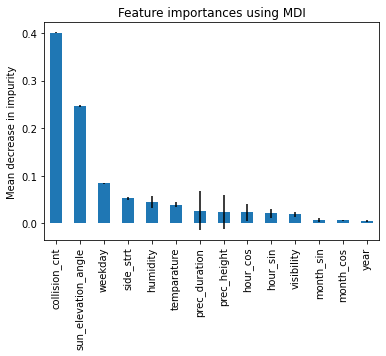

In [16]:
# Plot Feature Importance for baseline RF model

import time
import numpy as np

forest_importances = pd.Series(rf_clf.steps[1][1].feature_importances_, index=rf_clf.feature_names_in_)

start_time = time.time()
importances = rf_clf.steps[1][1].feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.steps[1][1].estimators_], axis=0)
elapsed_time = time.time() - start_time

fig, ax = plt.subplots()
forest_importances.sort_values(axis=0, ascending=False).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [15]:
## RANDOM PARAMETER GRID SEARCH
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(200, 501, 50)]
# Number of features to consider at every split
max_features = ['log2','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(30, 51, 10)]
max_depth.append(None)

criterion = ['entropy']
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':criterion}

print(random_grid)

{'n_estimators': [200, 250, 300, 350, 400, 450, 500], 'max_features': ['log2', 'sqrt'], 'max_depth': [30, 40, 50, None], 'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap': [False], 'criterion': ['entropy']}


In [18]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                               param_distributions = random_grid,
                               scoring='roc_auc',
                               n_iter = 20, 
                               cv = 5,
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1,
                               return_train_score = True)

In [19]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'criterion': ['entropy'],
                                        'max_depth': [30, 40, 50, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400, 450, 500]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=2)

In [20]:
rf_random.best_score_

0.8502921198762226

In [21]:
rf_random.best_params_

{'n_estimators': 450,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'entropy',
 'bootstrap': False}

In [22]:
brf_random = RandomizedSearchCV(estimator = BalancedRandomForestClassifier(), 
                               param_distributions = random_grid,
                               scoring='roc_auc',
                               n_iter = 20, 
                               cv = 5,
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1,
                               return_train_score = True)

In [23]:
brf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=BalancedRandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'criterion': ['entropy'],
                                        'max_depth': [30, 40, 50, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400, 450, 500]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=2)

In [24]:
brf_random.best_score_

0.8850452537225573

In [25]:
brf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'entropy',
 'bootstrap': False}

In [16]:
#Random Forest with oversampling using SMOTE and undersampling using RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline

from collections import Counter

# summarize class distribution - highly imbalanced dataset
counter = Counter(y_train)
print(counter)


## RANDOM PARAMETER GRID SEARCH
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

over_n = [float(x) for x in np.arange(0.25, 0.351, 0.05)]
#over_n = 0.1

# RandomUnderSampler undersampling
under_n = [float(x) for x in np.arange(0.4, 0.51, 0.05)]
#under_n = 0.3

# Create the random grid
random_grid = {'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__min_samples_leaf': min_samples_leaf,
               'randomforestclassifier__bootstrap': bootstrap,
               'randomforestclassifier__criterion':criterion,
              'smote__sampling_strategy': over_n,
              'randomundersampler__sampling_strategy': under_n}

print(random_grid)

Counter({0: 174119, 1: 36227})
{'randomforestclassifier__n_estimators': [200, 250, 300, 350, 400, 450, 500], 'randomforestclassifier__max_features': ['log2', 'sqrt'], 'randomforestclassifier__max_depth': [30, 40, 50, None], 'randomforestclassifier__min_samples_split': [2], 'randomforestclassifier__min_samples_leaf': [1], 'randomforestclassifier__bootstrap': [False], 'randomforestclassifier__criterion': ['entropy'], 'smote__sampling_strategy': [0.25, 0.3, 0.35], 'randomundersampler__sampling_strategy': [0.4, 0.45, 0.5]}


In [28]:
# define pipeline
# oversample positive (minority) to be x% the number of negative (majority)
over = SMOTE()
# randomly undersample negative (majority) to reduce the number of negative to x% of the positive (minority)
under = RandomUnderSampler() 

pipeline = make_pipeline(over, under, RandomForestClassifier())

rf_sampling_random = RandomizedSearchCV(pipeline, 
                               param_distributions = random_grid,
                               scoring='roc_auc',
                               n_iter = 20, 
                               cv = 5,
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1,
                               return_train_score = True)

In [29]:
rf_sampling_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE()),
                                             ('randomundersampler',
                                              RandomUnderSampler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'randomforestclassifier__bootstrap': [False],
                                        'randomforestclassifier__criterion': ['entropy'],
                                        'randomforestclassifier__max_depth': [30,
                                                                              40,
                                                                              50,
                                                                              None],
                                        'randomforestclassifier__max_features'

In [30]:
rf_sampling_random.best_score_

0.8588648838645139

In [31]:
rf_sampling_random.best_params_

{'smote__sampling_strategy': 0.3,
 'randomundersampler__sampling_strategy': 0.5,
 'randomforestclassifier__n_estimators': 500,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__bootstrap': False}

In [17]:
# BALANCED BAGGING
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(300, 501, 100)]

# Method of selecting samples for training each tree
bootstrap = [True]

# max_features
max_features = [0.6,1.0]

#Sampling strategy
sampling_strategy = [0.2,0.3,0.4]

#sampler
sampler = [RandomUnderSampler(),SMOTE()]


# Create the random grid
bb_random_grid = {'n_estimators': n_estimators,
                 'bootstrap': bootstrap,
                 'sampling_strategy':sampling_strategy,
                 'sampler':sampler,
                 'max_features':max_features}

# Create the random grid
bb_random_grid = {'n_estimators': n_estimators,
                 'bootstrap': bootstrap,
                 'sampling_strategy':sampling_strategy,
                 'sampler':sampler,
                 'max_features':max_features}

In [18]:
bb_random = RandomizedSearchCV(estimator = BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier(random_state=42)), 
                               param_distributions = bb_random_grid,
                               scoring='roc_auc',
                               n_iter=15,
                               cv = 3, 
                               verbose=3, 
                               n_jobs = -1,
                               return_train_score = True)

In [19]:
bb_random.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\imblearn\ensemble\_bagging.py", line 331, in fit
    return super().fit(X, y)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "

RandomizedSearchCV(cv=3,
                   estimator=BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier(random_state=42)),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_features': [0.6, 1.0],
                                        'n_estimators': [300, 400, 500],
                                        'sampler': [RandomUnderSampler(),
                                                    SMOTE()],
                                        'sampling_strategy': [0.2, 0.3, 0.4]},
                   return_train_score=True, scoring='roc_auc', verbose=3)

In [20]:
bb_random.best_score_

0.9054520202614468

In [21]:
bb_random.best_params_

{'sampling_strategy': 0.3,
 'sampler': SMOTE(),
 'n_estimators': 300,
 'max_features': 1.0,
 'bootstrap': True}

In [37]:
# LOGISTIC REGRESSION
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate



num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

lr_clf = make_pipeline(preprocessor_linear, LogisticRegression(max_iter=1000))
lr_clf.set_params(logisticregression__class_weight="balanced")

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=2,
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(add_indicator=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B43CEC5A00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_col

In [38]:
cv_result = cross_validate(lr_clf, X_train, y_train, scoring="roc_auc", cv=5)

In [39]:
cv_result['test_score'].mean()

0.8938550879498177

In [22]:
# Support Vector Classification with RandomOverSampling
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline 

num_pipe = make_pipeline(
    MinMaxScaler(feature_range=(0, 1))
)
cat_pipe = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor_svc = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

smote = SMOTE()

rus = RandomUnderSampler()

svc_clf = make_pipeline(preprocessor_svc, smote, rus, SVC())

In [43]:
#cv_result = cross_validate(svc_clf, X_train, y_train, scoring="roc_auc", cv=5)

KeyboardInterrupt: 

In [ ]:
cv_result['test_score'].mean()

In [23]:
parameters = {'smote__sampling_strategy':[float(x) for x in np.arange(0.30, 0.351, 0.05)],
              'randomundersampler__sampling_strategy':[float(x) for x in np.arange(0.45, 0.51, 0.05)],
              'svc__kernel':('linear', 'rbf', 'poly'), 
              'svc__C':[1,10,100],
              'svc__gamma':[1,0.1,0.001], 
              'svc__degree':[1,2]}


svc_grid = RandomizedSearchCV(svc_clf, 
                               param_distributions = parameters,
                               scoring='roc_auc',
                               n_iter = 10, 
                               cv = 5,
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1,
                               return_train_score = True)

#svc_grid = GridSearchCV(svc_clf, parameters, scoring="roc_auc", cv=3, verbose = 2)

In [ ]:
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
svc_grid.best_score_

In [ ]:
svc_grid.best_params_